<a href="https://colab.research.google.com/github/harshapriyanka/MachineLearning/blob/master/SHALA-2020/Assignments/MachineLearning/L4/Assignment_ML_LinearModels_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Regression(SGD)**



---
Importing the required packages


---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import california_housing
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns;
import random

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

In [3]:
print(x1)
print(x2)
print(x3)

[6 9 2 2 0 4]
[[3 9 6 3]
 [1 0 1 9]
 [0 5 2 3]]
[[[6 5 4 4 3]
  [7 0 1 4 2]
  [7 0 0 1 1]
  [3 9 0 7 9]]

 [[7 4 9 2 4]
  [5 3 9 6 3]
  [6 4 7 7 9]
  [4 1 2 9 0]]

 [[4 3 1 7 6]
  [1 3 6 4 0]
  [4 0 4 8 5]
  [1 6 6 9 4]]]


In [4]:
x1 = np.array([[1,2],
               [2, 4]])
y1 = np.array([1, 2])
print(np.matmul(x1,y1))

[ 5 10]




---
Using the same dataset **california_housing** try to find the best fit of the dataset by implementing stocastic gradient descent from scratch. 


---



In [0]:
housing_data = california_housing.fetch_california_housing()

In [0]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)

In [7]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [0]:
df = df[df.Target < 5]

In [0]:
X = df.MedInc
y = df.Target

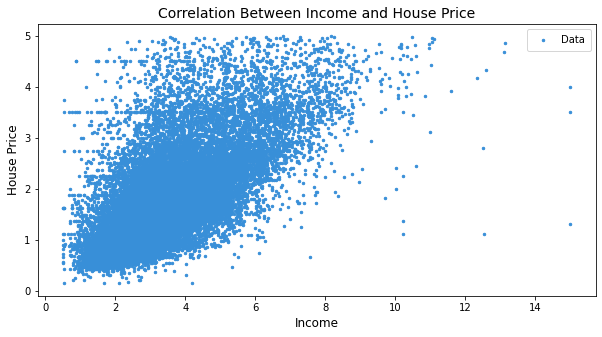

In [10]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

In [0]:
def next_batch(X, y, batch_size):
  i = np.arange(0,X.shape[0],batch_size)
  index = random.choice(i)
  x1 = X[index:index+batch_size]
  y1 = y[index:index+batch_size]
  return x1, y1

In [0]:
def SGD(X,y,lr = 0.01,epochs=100,batch_size = 1):
  ################################################
  ####write your code here######################## 
  #################################################   
  X = np.array(X)
  y = np.array(y)
  X1 = np.stack((X,np.ones_like(X)),axis=1)  # adding one's column, shape = (2, X.shape[0])
  X1 = np.array(X1) # shape = (X.shape[0],2)
  
  theta = np.zeros((X1.shape[1],1))  # shape = (2,1)
  mse = []

  for t in range(epochs):
    x1, y1 = next_batch(X1,y,batch_size)   # shape: x1 = (batch_size,2) y1 = (batch_size,)
    y1_pred = np.matmul(x1, theta)     # shape = (batch_size,1)
    theta = theta - lr * np.sum(np.matmul(x1, (y1_pred-y1))) / batch_size  
    m = theta[0]
    b = theta[1]
    epoch_mse = mean_squared_error(y, m*X+b)
    mse.append(epoch_mse)
  return m, b, mse

In [0]:
m, b, mse = SGD(X, y, lr=0.01, epochs=100, batch_size=2)

Plot the SGD curve(MSE against the epochs), and the line which represents the best fit of the given dataset.

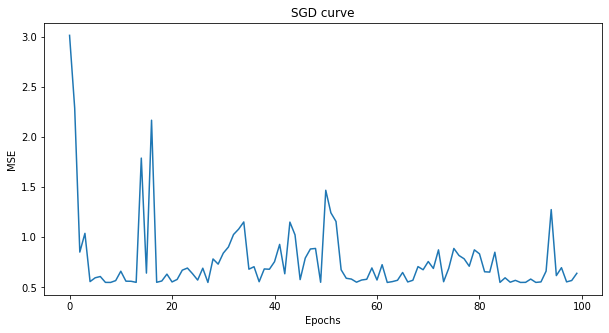

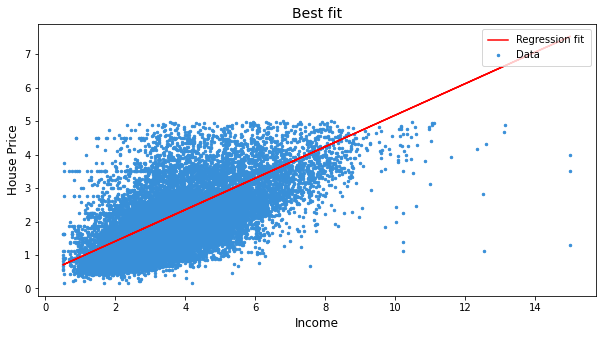

In [14]:
y_pred = m*X + b

################################################
###########write your code#####################
###############################################
plt.figure(figsize=(10,5))
plt.plot(range(len(mse)), mse)
plt.title('SGD curve')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.plot(X, y_pred,label='Regression fit',c = 'r')
plt.title('Best fit', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

#**SVM**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA



---


**Generating Random linearly separable data**


---



In [0]:
data = [[np.random.rand(), np.random.rand()] for i in range(10)]
for i, point in enumerate(data):
  x, y = point
  if 0.5*x - y + 0.25 > 0:
    data[i].append(-1)
  else:
    data[i].append(1)



---


**Visualizing the above data**


---



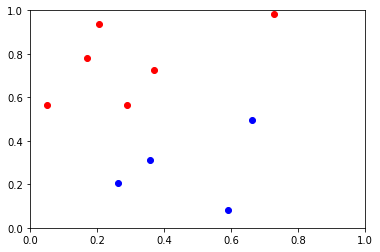

In [23]:
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  plt.xlim(0,1)
  plt.ylim(0,1)



---


**Train a SVM classifier using gradient descent and return a Weight Matrix which is a numpy array of length (N + 1) where N is dimension of training samples. You can refer to Fig. 1 in [this](https://www.cs.huji.ac.il/~shais/papers/ShalevSiSrCo10.pdf) paper for implementation. You can add arguments to svm_function according to your implementation.**


---



In [0]:
def svm_function(x, y, epoch, l_rate):
    ###################################
    ### Write your code here###########
    ###################################
    q = x.tolist()
    for i in range(len(x)):
      q[i].append(1)
    x = np.asarray(q)      
    w = np.zeros(len(x[0])) 
    
    for t in range(1, epoch):
      regf = 1 / (l_rate*t)
      for i, x1 in enumerate(x):
        p = np.dot(w, x[i])    
        if y[i] * p < 1:
          w = (1 - 2*regf*l_rate)*w + l_rate*(y[i]*x[i])
        else:
          w = (1 - 2*regf*l_rate)*w         
    return w



---


**Run SVM Classifier**


---



In [0]:
data = np.asarray(data)
X = data[:,:2]
Y = data[:,2]
w = svm_function(X, Y, 10000, 1)

# **Visualize the classifier**


---

Write a code to draw a lines corrosponding to 'w' vector you got as output from svm_function and for a line from which actual data was generated (0.5*x - y + 0.25). 

---



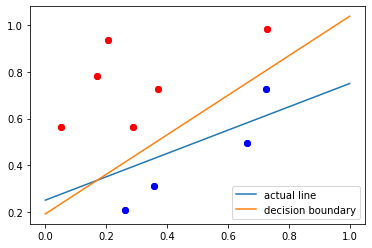

In [26]:
###################################
### Write your code here###########
###################################
x = np.linspace(0, 1)
y1 = 0.5*x + 0.25
y2 = -(w[0]*x+ w[2])/w[1]

for X[0], X[1], Y in data:
  if Y == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(X[0], X[1], c=clr)
plt.plot(x, y1, label='actual line')
plt.plot(x, y2, label='decision boundary')   
plt.legend(loc='best')
plt.show()